In [1]:
import pandas as pd
import sys
import os
dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.35. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# Load Dataset

In [2]:
file_path="https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataset = pd.read_csv(file_path, engine='python')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [3]:
dataset.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:>

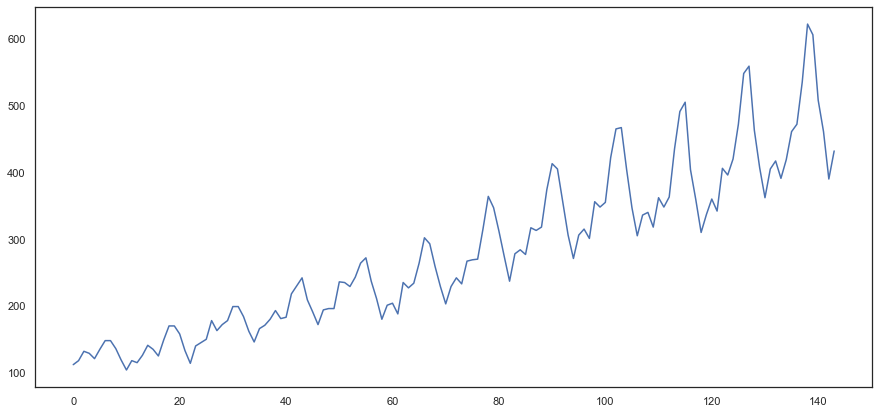

In [4]:
dataset['Passengers'].plot(figsize=(15,7))

# Train Model

In [5]:
ts_column = 'Month'
target = 'Passengers'
sep = ','

In [6]:
FORECAST_PERIOD = 12

In [7]:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |      0.8153688792060433      |
|           p-value           |      0.9918802434376409      |
|          #Lags Used         |             13.0             |
| Number of Observations Used |            130.0             |
|     Critical Value (1%)     |     -3.4816817173418295      |
|     Critical Value (5%)     |     -2.8840418343195267      |
|     Critical Value (10%)    |      -2.578770059171598      |
+-----------------------------+------------------------------+
 this series is non-stationary. Trying test again after differencing...
After differencing=1, results of Augmented Dickey-Fuller Test:
+-----------------

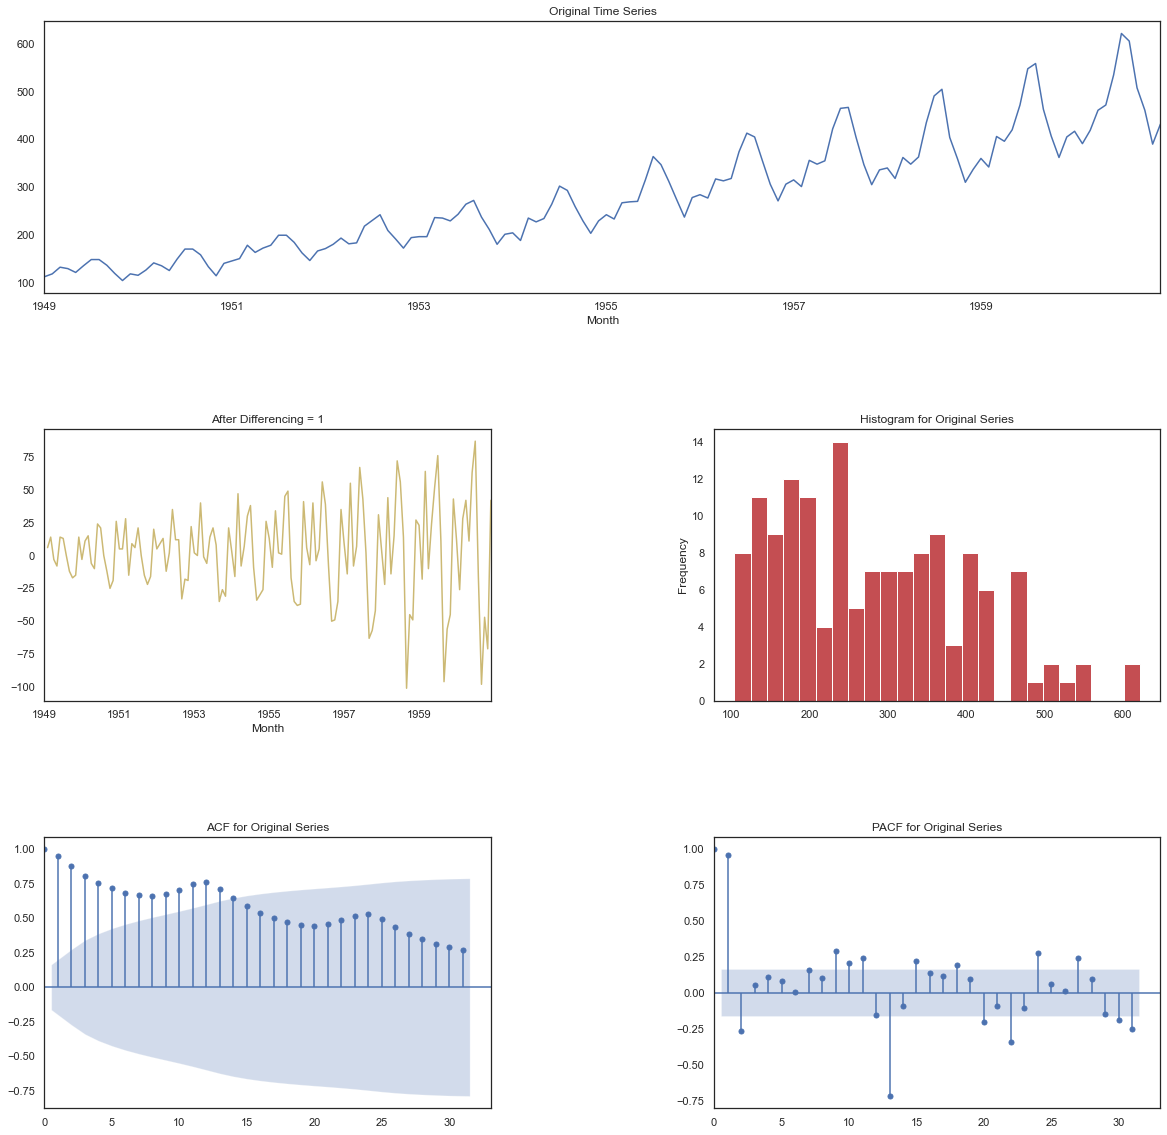

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(144, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  End of Prophet Fit
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3

Fold Number: 1 --> Train Shape: 129 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 21.84
    Std Deviation of actuals = 19.10
    Normalized RMSE = 114%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 134 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 49.74
    Std Deviation of actuals = 70.65
    Normalized RMSE = 70%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 139 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 33.94
    Std Deviation of act


-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (as % Std Dev of Actuals) = 77.28%
    MAPE (Mean Absolute Percent Error) = 12%
    RMSE (Root Mean Squared Error) = 81.9914
    Normalized RMSE (MinMax) = 32%
    Normalized RMSE (as Std Dev of Actuals)= 105%
Average CV RMSE of all predictions (micro) = 81.99137

Fitting model on entire train set. Please be patient...
    Time taken to train model (in seconds) = 0

Best Model is: Prophet
    Best Model (Mean CV) Score: 35.17


--------------------------------------------------
Total time taken: 15 seconds.
--------------------------------------------------


Leaderboard with best model on top of list:
            name       rmse
0       Prophet  35.174186
3            ML  77.689723
1  auto_SARIMAX  82.352655
2           VAR        inf


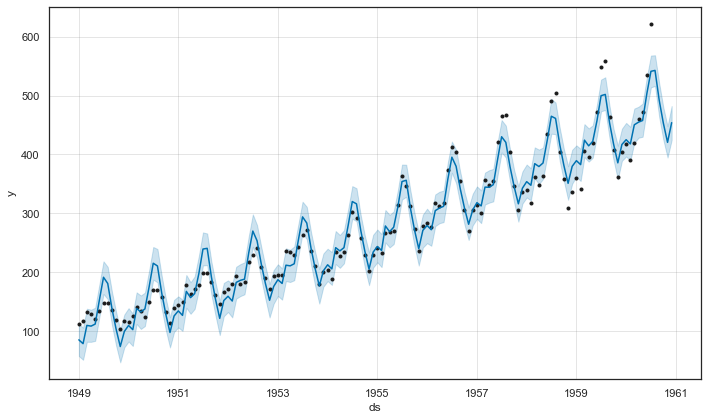

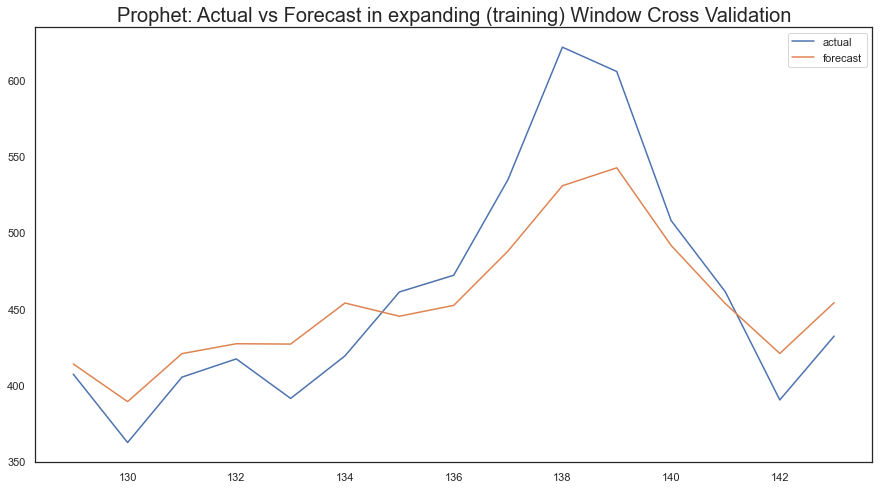

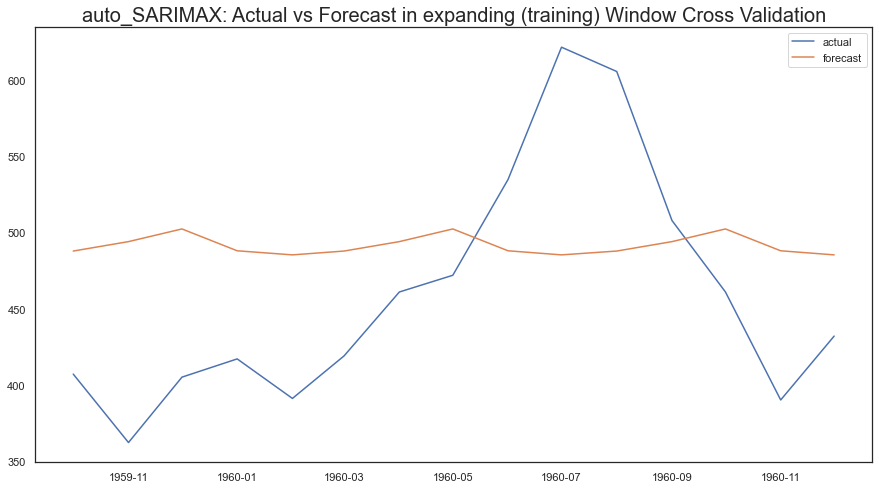

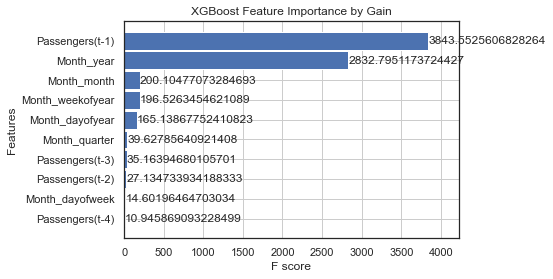

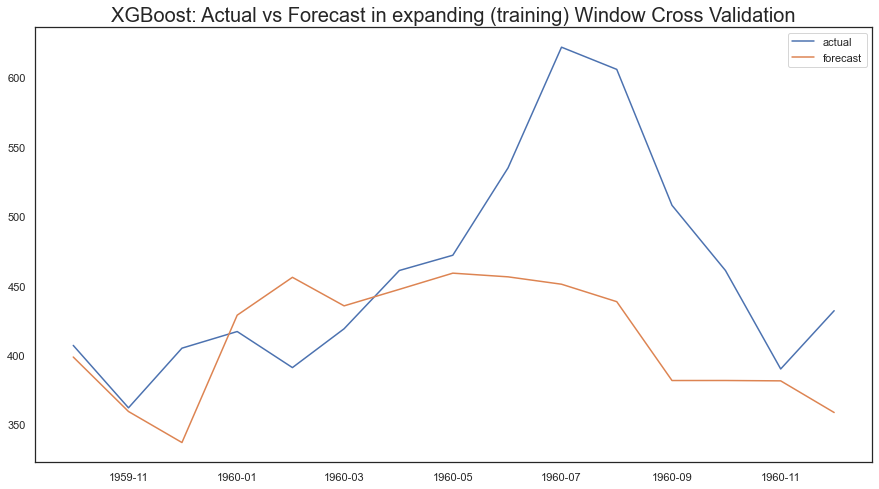

In [8]:
model.fit(
    traindata=dataset,
    # traindata=file_path,  # Alternately, you can specify the file directly
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

# Evaluate Results

In [9]:
model.get_leaderboard()

,name,rmse
0,Prophet,35.174186
3,ML,77.689723
1,auto_SARIMAX,82.352655
2,VAR,inf


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

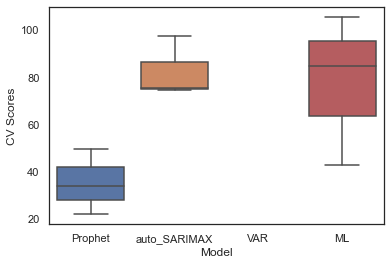

In [10]:
model.plot_cv_scores()

In [11]:
# Make sure all models have the same number of CV folds
model.get_cv_scores()

,Model,CV Scores
0,Prophet,21.843655
1,Prophet,49.742519
2,Prophet,33.936383
3,auto_SARIMAX,97.446035
4,auto_SARIMAX,74.341408
5,auto_SARIMAX,75.270523
6,VAR,inf
7,ML,42.613006
8,ML,84.857195
9,ML,105.598969


In [12]:
results_dict = model.get_ml_dict()

In [13]:
results_dict['Prophet']['forecast']  

array([413.71084386, 388.90451951, 420.46310064, 426.97400871,
       426.75261487, 453.74458755, 445.05801229, 452.18561676,
       487.96077268, 530.86845349, 542.66368545, 491.62921925,
       453.28591593, 420.58905618, 453.99322486])

In [14]:
results_dict['auto_SARIMAX']['forecast'] 

[array([487.93273337, 494.13445307, 502.46719871, 488.09960722,
        485.41407958]),
 array([487.93273337, 494.13445307, 502.46719871, 488.09960722,
        485.41407958]),
 array([487.93273337, 494.13445307, 502.46719871, 488.09960722,
        485.41407958])]

In [18]:
results_dict['ML']['forecast'] 

[array([398.62067, 359.34613, 336.96634, 428.77496, 456.07578],
       dtype=float32),
 array([435.5108 , 447.40277, 459.08197, 456.42245, 451.10553],
       dtype=float32),
 array([438.52243, 381.6762 , 381.69296, 381.4334 , 358.6087 ],
       dtype=float32)]

# Forecast Results

In [15]:
# Using Best Model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD
)  
future_predictions

Building Forecast dataframe. Forecast Period = 5


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
137,1960-06-01,466.147832,472.739761,528.453649,466.147832,466.147832,34.591309,34.591309,34.591309,34.591309,34.591309,34.591309,0.0,0.0,0.0,500.739142
138,1960-07-01,469.162805,510.961259,570.218627,469.162805,469.162805,70.421815,70.421815,70.421815,70.421815,70.421815,70.421815,0.0,0.0,0.0,539.584620
139,1960-08-01,472.278277,510.638967,568.768078,472.278277,472.278277,68.219918,68.219918,68.219918,68.219918,68.219918,68.219918,0.0,0.0,0.0,540.498195
140,1960-09-01,475.393749,461.473407,519.002040,475.393749,475.393749,16.117800,16.117800,16.117800,16.117800,16.117800,16.117800,0.0,0.0,0.0,491.511548
141,1960-10-01,478.408722,429.516044,484.775079,478.408722,478.408722,-21.777343,-21.777343,-21.777343,-21.777343,-21.777343,-21.777343,0.0,0.0,0.0,456.631378
142,1960-11-01,481.524194,392.898081,450.149284,481.524194,481.524194,-59.658593,-59.658593,-59.658593,-59.658593,-59.658593,-59.658593,0.0,0.0,0.0,421.865601
143,1960-12-01,484.539166,421.860029,479.690873,484.539166,484.539166,-33.463183,-33.463183,-33.463183,-33.463183,-33.463183,-33.463183,0.0,0.0,0.0,451.075984
144,1960-12-31,487.554139,433.990966,490.643464,487.554139,487.554139,-25.369753,-25.369753,-25.369753,-25.369753,-25.369753,-25.369753,0.0,0.0,0.0,462.184386
145,1961-01-31,490.669611,425.399868,483.000490,490.663147,490.679965,-35.797236,-35.797236,-35.797236,-35.797236,-35.797236,-35.797236,0.0,0.0,0.0,454.872376
146,1961-02-28,493.483586,468.623793,527.431278,493.456461,493.521548,4.351153,4.351153,4.351153,4.351153,4.351153,4.351153,0.0,0.0,0.0,497.834739


In [16]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='auto_SARIMAX'
)
future_predictions

Passengers,yhat,mean_se,mean_ci_lower,mean_ci_upper
1961-01-01,505.105300,29.830836,446.637935,563.572665
1961-02-01,527.171325,46.461034,436.109373,618.233277
1961-03-01,542.751845,50.162975,444.434220,641.069470
1961-04-01,529.614391,50.431163,430.771127,628.457655
1961-05-01,525.894257,50.738106,426.449397,625.339117


In [17]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='Prophet',
    simple=False

)
future_predictions

Building Forecast dataframe. Forecast Period = 5


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
137,1960-06-01,466.147832,472.193356,528.991256,466.147832,466.147832,34.591309,34.591309,34.591309,34.591309,34.591309,34.591309,0.0,0.0,0.0,500.739142
138,1960-07-01,469.162805,512.170739,567.962597,469.162805,469.162805,70.421815,70.421815,70.421815,70.421815,70.421815,70.421815,0.0,0.0,0.0,539.584620
139,1960-08-01,472.278277,510.422148,570.176829,472.278277,472.278277,68.219918,68.219918,68.219918,68.219918,68.219918,68.219918,0.0,0.0,0.0,540.498195
140,1960-09-01,475.393749,464.069098,520.761903,475.393749,475.393749,16.117800,16.117800,16.117800,16.117800,16.117800,16.117800,0.0,0.0,0.0,491.511548
141,1960-10-01,478.408722,427.113124,484.584189,478.408722,478.408722,-21.777343,-21.777343,-21.777343,-21.777343,-21.777343,-21.777343,0.0,0.0,0.0,456.631378
142,1960-11-01,481.524194,393.905402,448.727637,481.524194,481.524194,-59.658593,-59.658593,-59.658593,-59.658593,-59.658593,-59.658593,0.0,0.0,0.0,421.865601
143,1960-12-01,484.539166,422.713733,479.870698,484.539166,484.539166,-33.463183,-33.463183,-33.463183,-33.463183,-33.463183,-33.463183,0.0,0.0,0.0,451.075984
144,1960-12-31,487.554139,433.564034,490.660557,487.554139,487.554139,-25.369753,-25.369753,-25.369753,-25.369753,-25.369753,-25.369753,0.0,0.0,0.0,462.184386
145,1961-01-31,490.669611,423.206499,483.182979,490.657856,490.679396,-35.797236,-35.797236,-35.797236,-35.797236,-35.797236,-35.797236,0.0,0.0,0.0,454.872376
146,1961-02-28,493.483586,469.660219,526.250701,493.451388,493.513706,4.351153,4.351153,4.351153,4.351153,4.351153,4.351153,0.0,0.0,0.0,497.834739
